In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree , datasets
import seaborn as sns

In [ ]:
iris = datasets.load_iris()

In [ ]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
X , y = iris.data , iris.target

In [ ]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

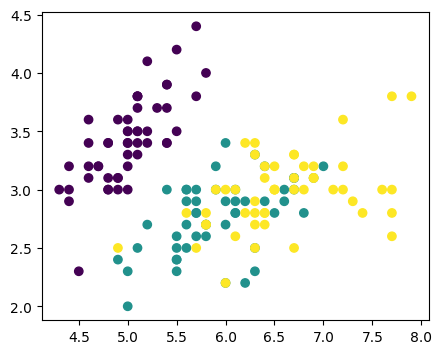

In [ ]:
plt.figure(figsize=(5,4))
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [ ]:
z = np.linspace(-2,4 ,13)
z

array([-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,
        3.5,  4. ])

In [ ]:
np.where(z == 0)

(array([4]),)

In [ ]:
np.where(z > 2)

(array([ 9, 10, 11, 12]),)

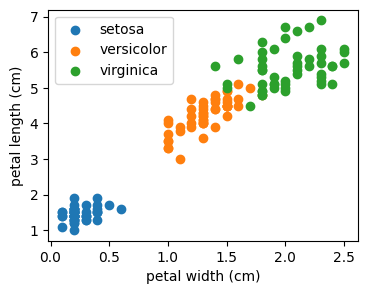

In [ ]:
i , j = 3,2

plt.figure(figsize = (4,3))

for n in range(len(iris.target_names)):
  plt.scatter(X[np.where(y == n)][:,i], X[np.where(y == n)][:,j],
            label = iris.target_names[n])

plt.xlabel(iris.feature_names[i])
plt.ylabel(iris.feature_names[j])
plt.legend()
plt.show()

Árbol de decisión

In [ ]:
clf = tree.DecisionTreeClassifier(criterion = "entropy")
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
clf.get_depth()

5

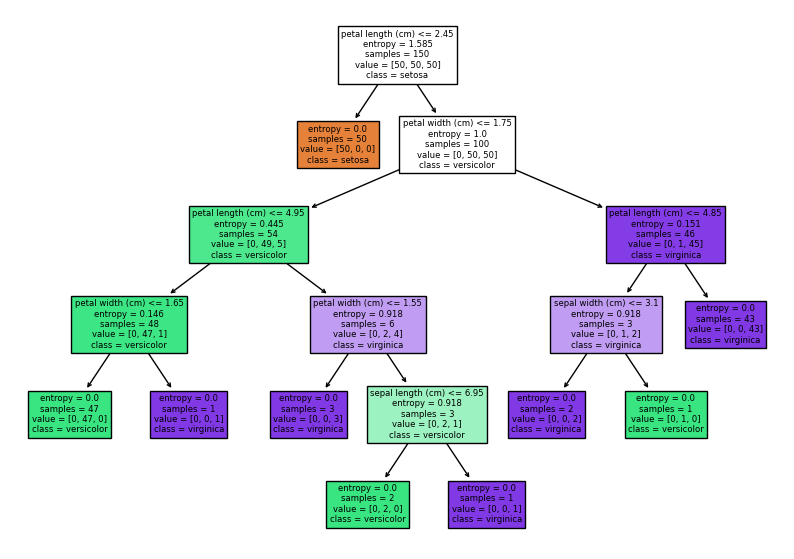

In [ ]:
plt.figure(figsize=(10, 7))
tree.plot_tree(clf, feature_names=iris.feature_names,
               class_names = iris.target_names,
               filled=True)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

In [ ]:
y_pred = clf.predict(X)

In [ ]:
np.mean( y == y_pred)

1.0

In [ ]:
cm = confusion_matrix(y , y_pred)
cm

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]])

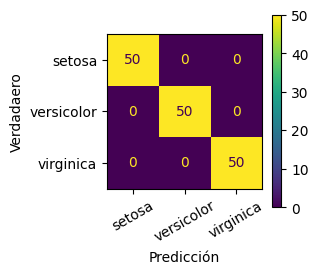

In [ ]:
fig , ax = plt.subplots(figsize = (2.5, 2.5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm ,
                              display_labels=iris.target_names)
disp.plot(ax = ax)
ax.set_xlabel("Predicción")
ax.set_ylabel("Verdadaero")
ax.set_xticklabels(iris.target_names, rotation = 30)
plt.show()